# Simulation of Feedback with Chaotic Dynamics from a Kawasaki Ising Model

In [20]:
import numpy as np
import random
from fractions import Fraction
from Commands import dec2int, bernoulli, control, order_parameter
from MonteCarloCommands import energy, boltzmann_probability
import matplotlib.pyplot as plt
import time



## Initialization of Parameters

In [21]:

length = 100
random.seed(10)
times = 2
low_prob = 00
high_prob = 100 + 1
Beta = 2
K = 1 
num_chains = 2
spacing = 10
num_points = int(np.ceil((high_prob-low_prob)/spacing))


## Initialization of Order Parameter Arrays

In [22]:

#record = np.zeros([high_prob-low_prob, 1], dtype=float)
record1 = np.zeros([num_points, 1], dtype=float)
record2 = np.zeros([num_points, 1], dtype=float)
recordferro = np.zeros([num_points,1], dtype=float) # set up for ferromagnetic order parameter
#record3 = np.zeros([high_prob-low_prob, 1], dtype=float)
recordlong = np.zeros((num_points, length), dtype=float)


## Control + Kawasaki

In [23]:

for k in range(0, times):
    j = 0
    print(k)
    # Probability of choosing the Control Map
    for prob in range(low_prob, high_prob, spacing):
        #print(prob)
        number1 = random.random()
        number2 = random.random()
        #number3 = random.random()
        #number = tests[k]
        rep1 = dec2int(number1, length)
        rep2 = dec2int(number2, length)
        #rep3 = dec2int(number3, length)
        #print(k, rep, dec2int(Fraction(2, 3), length), dec2int(Fraction(1, 3), length))
        for i in range((length**2)//2):
            if random.random() > (float(prob) / 100):
                rep1 = bernoulli(rep1, length)
            else:
                rep1 = control(rep1, length)
            if random.random() > (float(prob)/100):
                rep2 = bernoulli(rep2, length)
            else:
                rep2 = control(rep2, length)
            #if random.random() > (float(prob)/100):
            #    rep3 = bernoulli(rep3, length)
            #else:
            #    rep3 = control(rep3, length)
            # Initializing Ising Array for Monte Carlo Simulation
            lattice = [format(rep1, '0'+str(length)+'b'), format(rep2, '0'+str(length)+'b')]
                       #format(rep3, '0'+str(length)+'b')]
            for repeat in range(1):
                for x_pos in range(0, num_chains): # this section takes about 1/100 s at length = 100, accounts for most of the run time
                    for y_pos in range(0, length):
                        E_i = energy(x_pos, y_pos, lattice, num_chains, length, K, True)
                        old = lattice[x_pos]
                        # noinspection PyTypeChecker
                        lattice[x_pos] = format(int(lattice[x_pos], base=2) ^ (1 << (length - y_pos - 1)), '0' + str(length) + 'b')
                        E_f = energy(x_pos, y_pos, lattice, num_chains, length, K, True)
                        if random.random() <= boltzmann_probability(E_i, E_f, Beta):
                            pass
                        else:
                            lattice[x_pos] = old
            

            
            rep1 = int(lattice[0], base=2)
            rep2 = int(lattice[1], base=2)
            #rep3 = int(lattice[2], base=2)
        #record[j] += (order_parameter(rep1, length)+order_parameter(rep2,length)+order_parameter(rep3, length))/(3*times) # can get rid of. just average the other three records in a plot
        record1[j] += order_parameter(rep1, length)/times
        record2[j] += order_parameter(rep2, length)/times
        recordferro[j] += (lattice[0].count('1')+lattice[1].count('1')-lattice[0].count('0')-lattice[1].count('0'))/(2*length)/times
        #record3[j] += order_parameter(rep3, length)/times
        for place in range(length):
            recordlong[j,place] = order_parameter(int(lattice[0][length-1-place] +lattice[1][length-1-place] 
                              , base=2),2)
        j += 1
        #print(j, number, rep, record[j])
        


0
1


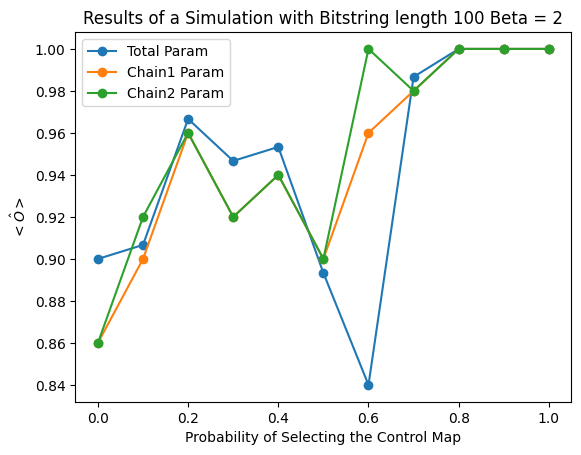

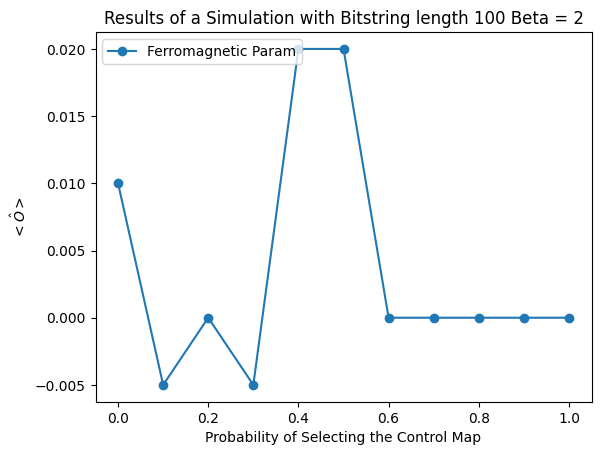

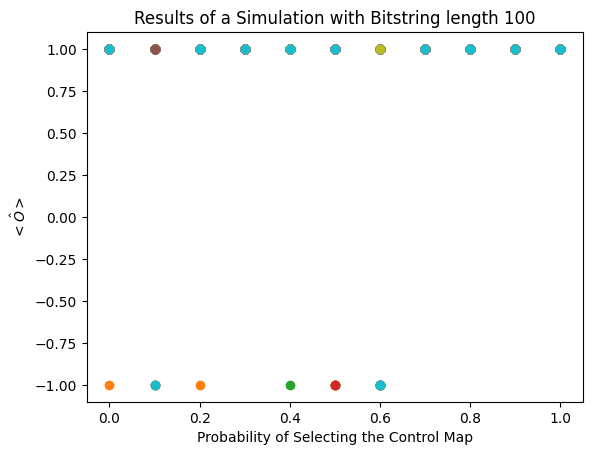

['0101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101', '1010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010101010']
-422550200076076467165567735125


IndexError: index 99 is out of bounds for axis 0 with size 11

In [61]:
plt.rcParams.update({
    "text.usetex": False,
})
#print(record[99])

fig, ax = plt.subplots()
ax.plot( np.linspace(0,1,num_points), totalparam, marker='o', label="Total Param")

ax.plot( np.linspace(0,1,num_points), record1, marker='o', label= "Chain1 Param")
ax.plot( np.linspace(0,1,num_points), record2, marker='o', label= "Chain2 Param")

#Below creates two lines crossing at (.5,.5)
#plt.axvline(.5)
#plt.axhline(.5)

#ax.plot( np.linspace(0,1,high_prob-low_prob), record3, marker='o', label= "Chain3 Param")
plt.legend(loc='upper left')
ax.set_xlabel(r'Probability of Selecting the Control Map')
ax.set_ylabel(r'$ <\hat{O}>$')
ax.set_title(r'Results of a Simulation with Bitstring length '+str(length) +' Beta = ' +str(Beta))
fig, ax = plt.subplots()
ax.plot( np.linspace(0,1,num_points), recordferro, marker='o', label= "Ferromagnetic Param")
plt.legend(loc='upper left')
ax.set_xlabel(r'Probability of Selecting the Control Map')
ax.set_ylabel(r'$ <\hat{O}>$')
ax.set_title(r'Results of a Simulation with Bitstring length '+str(length) +' Beta = ' +str(Beta))
fig, ax = plt.subplots()
for p in range(length):
    ax.scatter( np.linspace(0,1,num_points), recordlong[:, p], marker='o', label="Param Row =" + str(p))

ax.set_xlabel(r'Probability of Selecting the Control Map')
ax.set_ylabel(r'$ <\hat{O}>$')
ax.set_title(r'Results of a Simulation with Bitstring length '+str(length))
#fig.save("200 Length BitString, Full Probability Spectrum")
#plt.show()
#fig, ax = plt.subplots()
#ax.plot( np.linspace(.3,.6,30), record1[30:60], marker='o')
#ax.set_xlabel(r'Probability of Selecting the Control Map')
#ax.set_ylabel(r'$ <\hat{O}>$')
#ax.set_title(r'Results of a Simulation with Bitstring length '+str(length))
#fig.save("200 Length BitString, Full Probability Spectrum")
plt.show()
print(lattice)
print(int(lattice[0], base = 2)-int(lattice[1], base = 2))
print(record1[99],  record2[99])

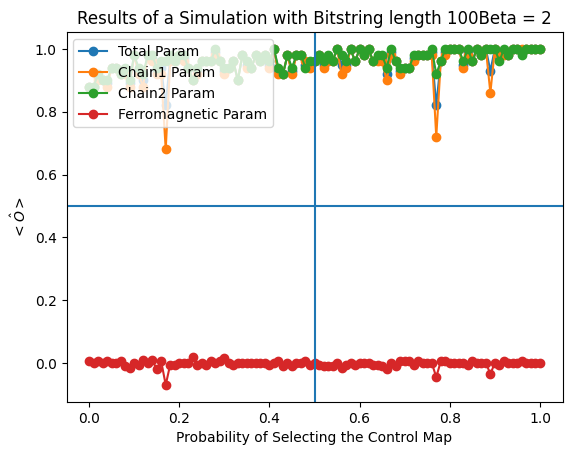

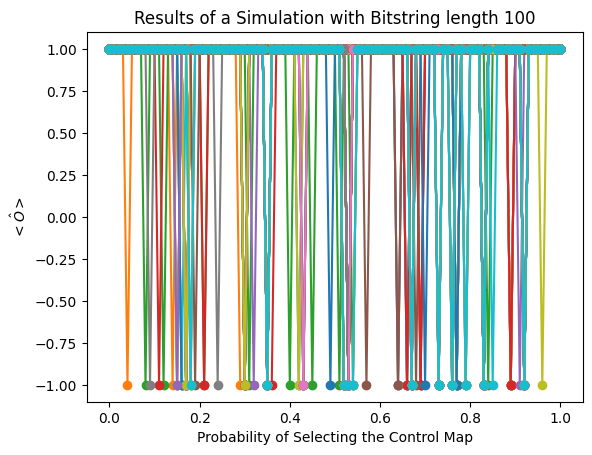

In [ ]:

fig, ax = plt.subplots()
ax.plot( np.linspace(0,1,high_prob-low_prob), record1/2 + record2/2, marker='o', label="Total Param")
ax.plot( np.linspace(0,1,high_prob-low_prob), record1, marker='o', label= "Chain1 Param")
ax.plot( np.linspace(0,1,high_prob-low_prob), record2, marker='o', label= "Chain2 Param")
ax.plot( np.linspace(0,1,high_prob-low_prob), recordferro, marker='o', label= "Ferromagnetic Param")
plt.axvline(.5)
plt.axhline(.5)

#ax.plot( np.linspace(0,1,high_prob-low_prob), record3, marker='o', label= "Chain3 Param")
plt.legend(loc='upper left')
ax.set_xlabel(r'Probability of Selecting the Control Map')
ax.set_ylabel(r'$ <\hat{O}>$')
ax.set_title(r'Results of a Simulation with Bitstring length '+str(length) +'Beta = ' +str(Beta))
fig, ax = plt.subplots()
for p in range(length):
    ax.plot( np.linspace(0,1,high_prob-low_prob), recordlong[:, p], marker='o', label="Param Row =" + str(p))

ax.set_xlabel(r'Probability of Selecting the Control Map')
ax.set_ylabel(r'$ <\hat{O}>$')
ax.set_title(r'Results of a Simulation with Bitstring length '+str(length))
#fig.save("200 Length BitString, Full Probability Spectrum")
#plt.show()
#fig, ax = plt.subplots()
#ax.plot( np.linspace(.3,.6,30), record1[30:60], marker='o')
#ax.set_xlabel(r'Probability of Selecting the Control Map')
#ax.set_ylabel(r'$ <\hat{O}>$')
#ax.set_title(r'Results of a Simulation with Bitstring length '+str(length))
#fig.save("200 Length BitString, Full Probability Spectrum")
plt.show()
